#Importing Necessary Libararies and Datasets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import plot_tree,DecisionTreeClassifier,export_text
from sklearn.model_selection import train_test_split

In [ ]:
file=pd.read_csv("/content/drive/MyDrive/Datasets/Crop_Recommendation.csv")
file.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [ ]:
target_values=file["Crop"].unique()

#Exploratory Data Analaysis

**Encoding**

In [ ]:
label_encoder={}
for column in file.iloc[:,7:].columns:
  label_encoder[column]=LabelEncoder()
  file[column]=label_encoder[column].fit_transform(file[column])

In [ ]:
file.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


*Crop name has been encoded so that it can be predicted efficiently*

**Feature Scaling**

In [ ]:
features=file.iloc[:,0:7]
cols=features.columns
scaler=StandardScaler().fit(features)
features=scaler.transform(features)
features=pd.DataFrame(features,columns=cols)
features

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2195,1.529390,-0.587134,-0.318922,0.228814,-0.227709,0.401395,1.352437
2196,1.312641,-1.163269,-0.417666,0.355720,-0.666947,-0.494413,0.445183
2197,1.827421,-0.617457,-0.358420,-0.293218,-0.191235,-0.138120,1.271418
2198,1.800327,-0.647780,-0.279425,0.129612,-0.869518,0.373904,0.431545


In [ ]:
for column in features.columns:
  new=pd.Series(features[column].values,index=file[column]).to_dict()
  file[column]=file[column].map(new)

In [ ]:
file.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,20
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,20
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,20
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,20
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,20


*All the numeric field has been feature scaled to similar range so that while classificartion every field is given equal importance*

*If size of the values differ then priority is given to values with larger size*

**Basic EDA**

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   float64
 1   Phosphorus   2200 non-null   float64
 2   Potassium    2200 non-null   float64
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 137.6 KB


In [ ]:
file.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [ ]:
file.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2200.000000
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.617308e-16,-1.808654e-16,-1.679465e-16,1.291896e-16,10.500000
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,6.345731
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00,0.000000
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01,5.000000
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,-1.564454e-01,10.500000
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.817982e-01,8.296508e-01,5.869540e-01,3.786243e-01,16.000000
max,2.423483e+00,2.778707e+00,3.097591e+00,3.567190e+00,1.280400e+00,4.478912e+00,3.550701e+00,21.000000


In [ ]:
file.dtypes

Nitrogen       float64
Phosphorus     float64
Potassium      float64
Temperature    float64
Humidity       float64
pH_Value       float64
Rainfall       float64
Crop             int64
dtype: object

**Visualisation**

<Axes: >

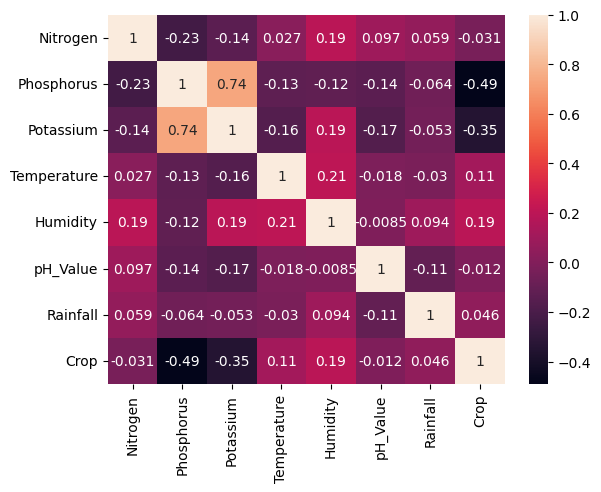

In [ ]:
sns.heatmap(data=file.iloc[:,0:8].corr(),annot=True)

*It shows how different values are dependent on other variables*

<Axes: >

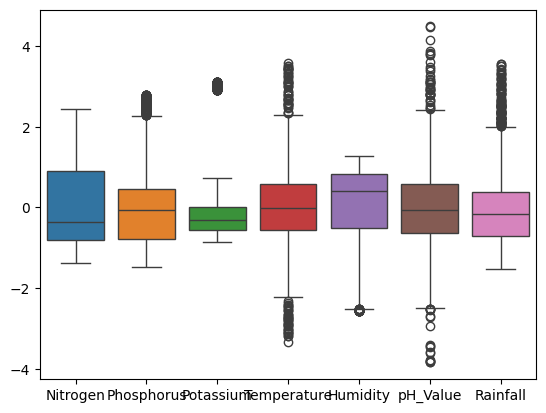

In [ ]:
sns.boxplot(data=file.iloc[:,0:7])

*This box plot shows various areas of different fields like max value,min value and median.But it also has too many outliers which are less than minimum value and more than maximum value which hinders the analysis process*

In [ ]:
for column in file.iloc[:,0:7].columns:
  q1=file[column].quantile(0.25)
  q3=file[column].quantile(0.75)
  iqr=q3-q1
  ub=q3+1.5*iqr
  lb=q1-1.5*iqr
  file=file[(file[column]>lb) & (file[column]<ub)]

<Axes: >

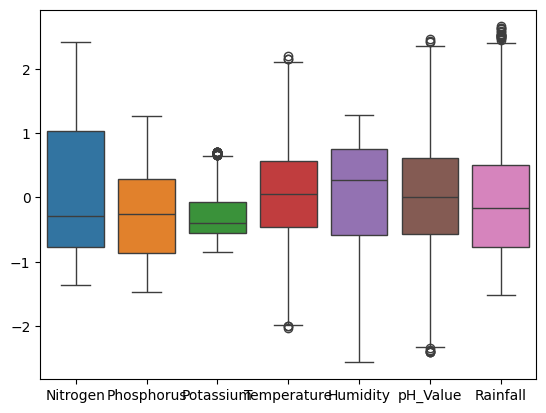

In [ ]:
sns.boxplot(data=file.iloc[:,0:7])

*These hinderance are removed through the process of inter quartile range*

*Now we have no outliers which can be seen in the above box plot*

In [ ]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1835 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     1835 non-null   float64
 1   Phosphorus   1835 non-null   float64
 2   Potassium    1835 non-null   float64
 3   Temperature  1835 non-null   float64
 4   Humidity     1835 non-null   float64
 5   pH_Value     1835 non-null   float64
 6   Rainfall     1835 non-null   float64
 7   Crop         1835 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 129.0 KB


#Classification

**Train Test Split**

In [ ]:
variable=file.iloc[:,0:7]
target=file.iloc[:,7:]
x_train,x_test,y_train,y_test=train_test_split(variable,target,test_size=0.3,random_state=42)
x_train.shape

(1284, 7)

**Decision Tree Function**

In [ ]:
def decision_tree_classifier(criterion):
  dtc_model=DecisionTreeClassifier(criterion=criterion,random_state=42)
  dtc_model.fit(x_train,y_train)
  y_pred=dtc_model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))

  plt.figure(figsize=(20,10))
  plot_tree(dtc_model, filled=True, feature_names=variable.columns, class_names=target_values)
  plt.title(f"Decision Tree using {criterion}")
  plt.show()

**Decision Tree using gini**

Accuracy: 0.9927404718693285
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        35
           6       0.97      1.00      0.98        31
           8       0.97      0.94      0.95        31
           9       1.00      1.00      1.00        34
          10       1.00      1.00      1.00        26
          11       1.00      0.96      0.98        23
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        17
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        27
          16       1.00      1.00      1.00        28
          17       1.00      1.00      1.00        19
          18       1.00      

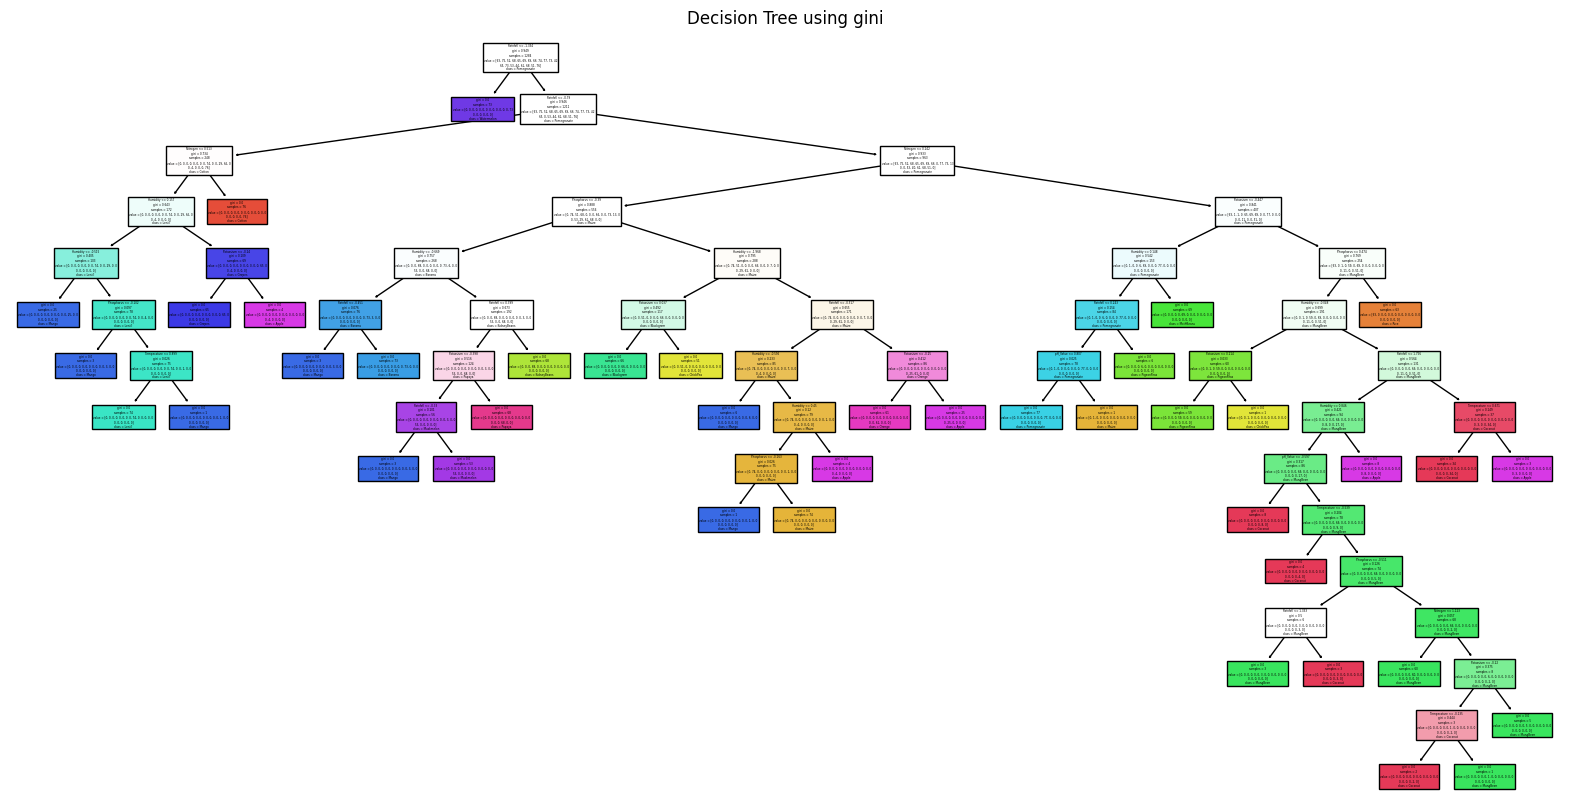

In [ ]:
decision_tree_classifier("gini")

**Decision Tree using Entropy**

Accuracy: 0.985480943738657
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        37
           2       0.92      0.92      0.92        25
           3       1.00      0.96      0.98        25
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        35
           6       0.97      1.00      0.98        31
           8       0.97      0.97      0.97        31
           9       1.00      1.00      1.00        34
          10       1.00      1.00      1.00        26
          11       0.96      0.96      0.96        23
          12       1.00      1.00      1.00        23
          13       0.88      0.88      0.88        17
          14       1.00      1.00      1.00        35
          15       1.00      1.00      1.00        27
          16       1.00      1.00      1.00        28
          17       0.95      1.00      0.97        19
          18       1.00      1

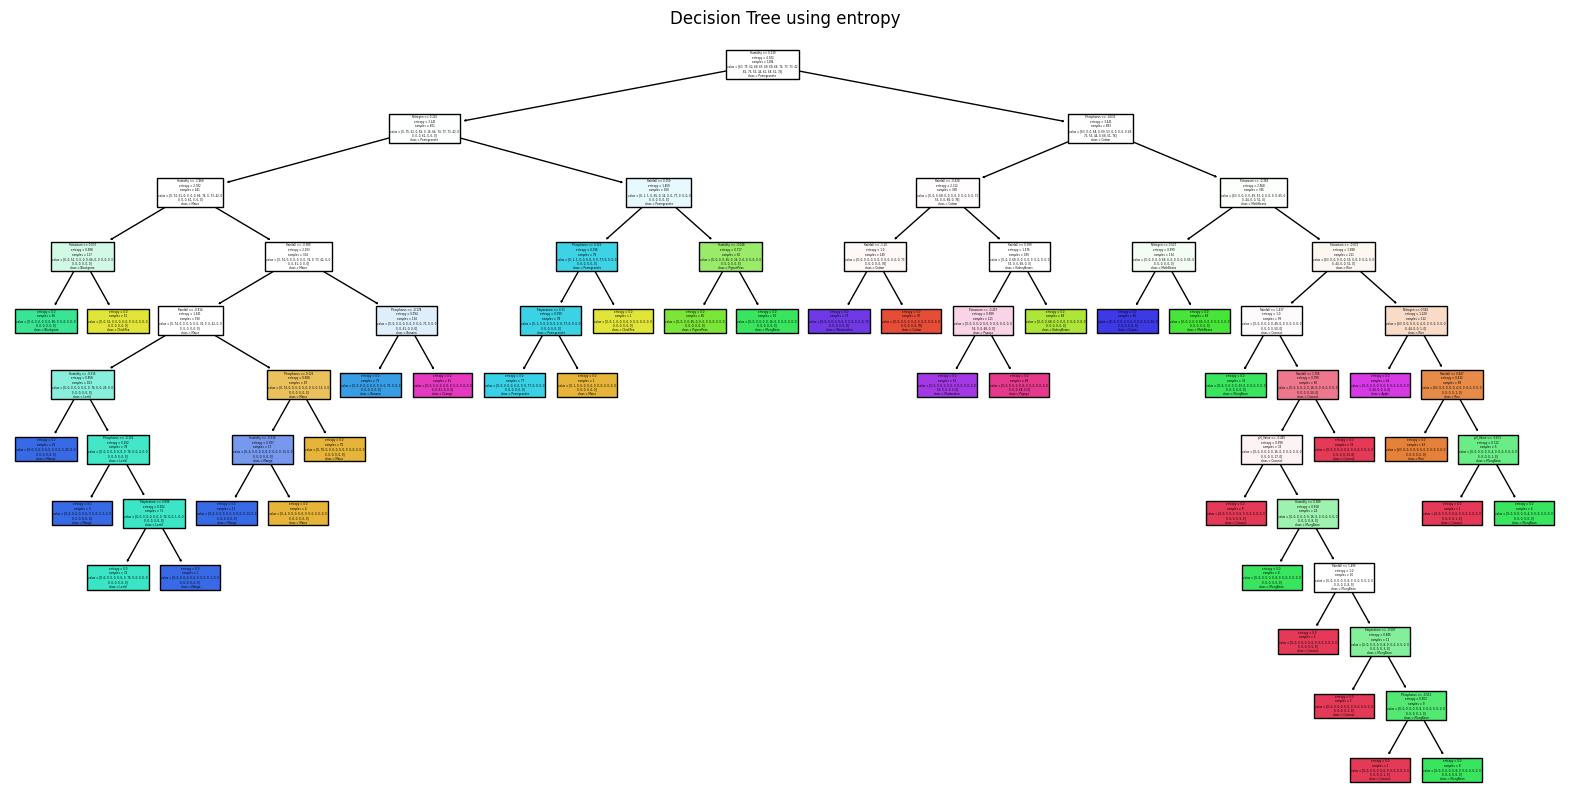

In [ ]:
decision_tree_classifier("entropy")

#Interpretation

**Decision Tree Classification using gini and entropy**

*Acuuracy score is more than entropoy which makes it more suitable for classifiation*

*Precision and Recall values for different target values are too good to consider it reasonable for classification such data type*